# Exploratory Data Analysis - Combined Dataset
## San Diego County Wildfire Risk Data (2000-2002)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

df = pd.read_parquet('data/combined_data.parquet')
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (6458400, 14)
Memory usage: 689.83 MB


## 1. Dataset Overview

In [4]:
df.info()

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6458400 entries, 0 to 6458399
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   lat          float64
 1   lon          float64
 2   year         int64  
 3   month        int64  
 4   ppt          float64
 5   tdmean       float64
 6   tmax         float64
 7   vpdmax       float64
 8   burned_area  float64
 9   ndvi         float64
 10  landcover    float64
 11  elevation    float64
 12  slope        float64
 13  aspect       float64
dtypes: float64(12), int64(2)
memory usage: 689.8 MB


lat        lon  year  month  ppt  tdmean  tmax  vpdmax  burned_area  \
0  32.53333 -117.60833  2000      1  NaN     NaN   NaN     NaN          0.0   
1  32.53333 -117.60833  2000      2  NaN     NaN   NaN     NaN          0.0   
2  32.53333 -117.60833  2000      3  NaN     NaN   NaN     NaN          0.0   
3  32.53333 -117.60833  2000      4  NaN     NaN   NaN     NaN          0.0   
4  32.53333 -117.60833  2000      5  NaN     NaN   NaN     NaN          0.0   

   ndvi  landcover   elevation    slope    aspect  
0   NaN       52.0  275.700588  0.24857 -0.458612  
1   NaN       52.0  275.700588  0.24857 -0.458612  
2   NaN       52.0  275.700588  0.24857 -0.458612  
3   NaN       52.0  275.700588  0.24857 -0.458612  
4   NaN       52.0  275.700588  0.24857 -0.458612

In [5]:
display(df.describe())

lat           lon          year         month           ppt  \
count  6.458400e+06  6.458400e+06  6.458400e+06  6.458400e+06  4.890000e+06   
mean   3.301667e+01 -1.168458e+02  2.012000e+03  6.500000e+00  2.715566e+01   
std    2.814480e-01  4.426287e-01  7.211103e+00  3.452053e+00  4.542900e+01   
min    3.253333e+01 -1.176083e+02  2.000000e+03  1.000000e+00  0.000000e+00   
25%    3.277500e+01 -1.172271e+02  2.006000e+03  3.750000e+00  0.000000e+00   
50%    3.301667e+01 -1.168458e+02  2.012000e+03  6.500000e+00  7.256000e+00   
75%    3.325833e+01 -1.164646e+02  2.018000e+03  9.250000e+00  3.332700e+01   
max    3.350000e+01 -1.160833e+02  2.024000e+03  1.200000e+01  5.397050e+02   

             tdmean          tmax        vpdmax   burned_area          ndvi  \
count  4.890000e+06  4.890000e+06  4.890000e+06  6.458400e+06  4.589736e+06   
mean   6.316990e+00  2.396294e+01  2.241357e+01  9.411000e-04  3.471967e-01   
std    5.957424e+00  6.821459e+00  1.321706e+01  3.066292e-02  1.577793e-01   
min   -1.591000e+01  4.943000e+00  1.378000e+00  0.000000e+00 -1.991000e-01   
25%    2.147000e+00  1.891000e+01  1.289900e+01  0.000000e+00  2.300000e-01   
50%    6.461000e+00  2.278000e+01  1.839700e+01  0.000000e+00  3.546000e-01   
75%    1.066900e+01  2.887000e+01  2.876400e+01  0.000000e+00  4.651000e-01   
max    2.072600e+01  4.841900e+01  1.049630e+02  1.000000e+00  8.989000e-01   

          landcover     elevation         slope        aspect  
count  5.162928e+06  6.458400e+06  6.458400e+06  6.458400e+06  
mean   4.803351e+01  5.066428e+02  1.853448e-01 -6.721882e-02  
std    1.347070e+01  4.721360e+02  1.612892e-01  1.576373e+00  
min    2.100000e+01 -6.877696e+01  0.000000e+00 -3.141486e+00  
25%    5.200000e+01  8.639350e+01  4.314717e-02 -1.179626e+00  
50%    5.200000e+01  3.672518e+02  1.578649e-01  0.000000e+00  
75%    5.200000e+01  8.859956e+02  2.929535e-01  9.677779e-01  
max    9.500000e+01  2.001357e+03  8.420498e-01  3.141512e+00

## 2. Null Value Analysis

In [6]:
null_stats = pd.DataFrame({
    'Null_Count': df.isnull().sum(),
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Non_Null_Count': df.notnull().sum(),
    'Dtype': df.dtypes
})
null_stats = null_stats.sort_values('Null_Percentage', ascending=False)

display(null_stats)

Null_Count  Null_Percentage  Non_Null_Count    Dtype
ndvi            1868664            28.93         4589736  float64
ppt             1568400            24.28         4890000  float64
tmax            1568400            24.28         4890000  float64
vpdmax          1568400            24.28         4890000  float64
tdmean          1568400            24.28         4890000  float64
landcover       1295472            20.06         5162928  float64
year                  0             0.00         6458400    int64
month                 0             0.00         6458400    int64
lat                   0             0.00         6458400  float64
lon                   0             0.00         6458400  float64
burned_area           0             0.00         6458400  float64
elevation             0             0.00         6458400  float64
slope                 0             0.00         6458400  float64
aspect                0             0.00         6458400  float64

### Null Value Percentage

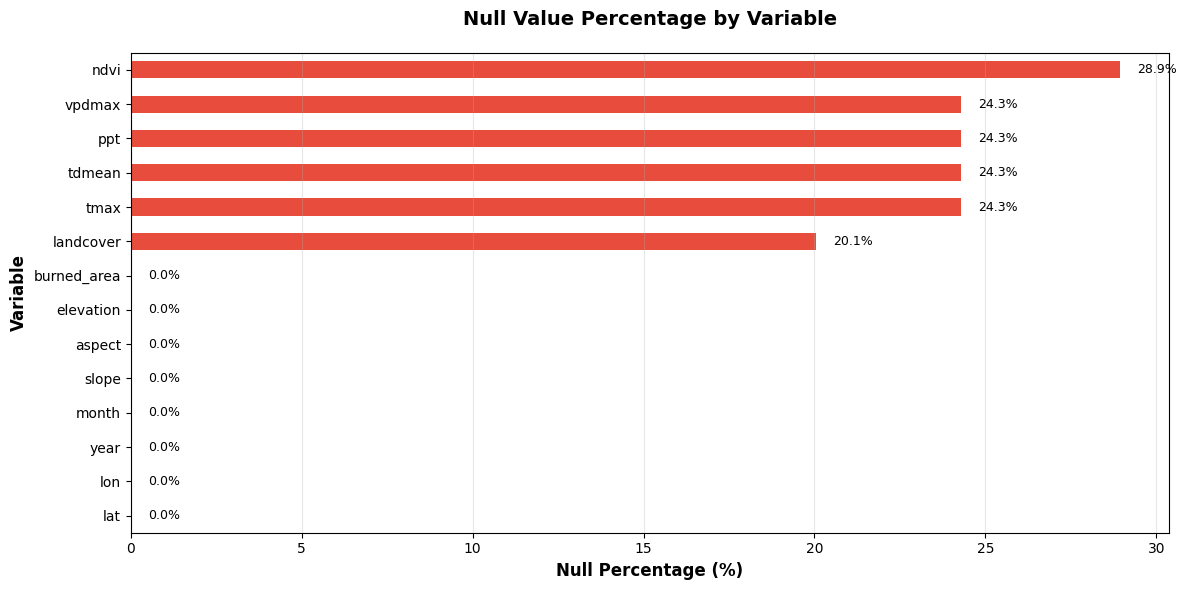

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
null_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=True)
colors = ['#2ecc71' if x == 0 else '#e74c3c' if x > 20 else '#f39c12' for x in null_pct]

null_pct.plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Null Percentage (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Variable', fontsize=12, fontweight='bold')
ax.set_title('Null Value Percentage by Variable', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

for i, v in enumerate(null_pct):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### Insights:

1. Missing data pattern: The identical 24.3% across climate variables suggests these are systematically missing (likely from the same PRISM data gaps or temporal alignment issues)
2. NDVI (vegetation) and Landcover (type of land) missingness is concerning because they are key predictors for wildfire spread.

### Next steps:

Investigate missing data pattern espetially for NDVI and Landcover. The missingness could be related to the data point being in the ocean. 

### Null Value Correlation

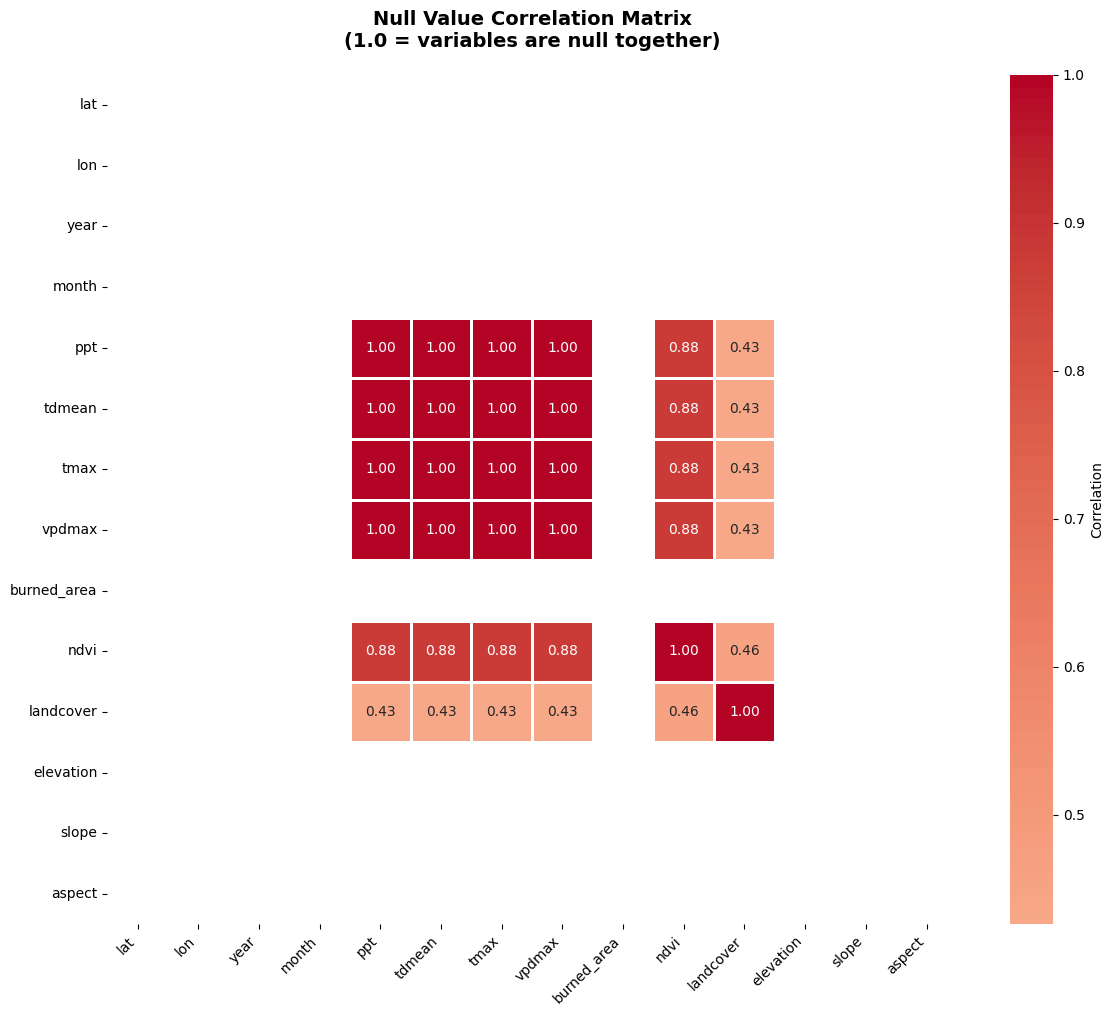

In [8]:
null_corr = df.isnull().corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(null_corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax,
            cbar_kws={'label': 'Correlation'})
ax.set_title('Null Value Correlation Matrix\n(1.0 = variables are null together)', 
             fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Insights:

1. Climate variables (ppt, tdmean, tmax, and vpdmax) are alwats missing together (corr = 1.0), which suggests that there are systematic gaps in the data rather than random missingness.
2. NDVI and climate variables have strong relationships (corr = 0.88), which suggests that they are missing for similar reasons (there is a dependency) or there is an alignment issue of the coordinates.
3. Landcover has moderate correlation with other missing variables, which suggests that the missingness in Landcover could be independent of the other variables.

### Next Steps:

Visualize the missing data with respect to the coordinates and time. This will help us understand the patterns of missingness and see if NDVI and climate variables are missing for similar reasons (e.g. data points are in the ocean or data missing in some months).

### Temporal Missingness Analysis

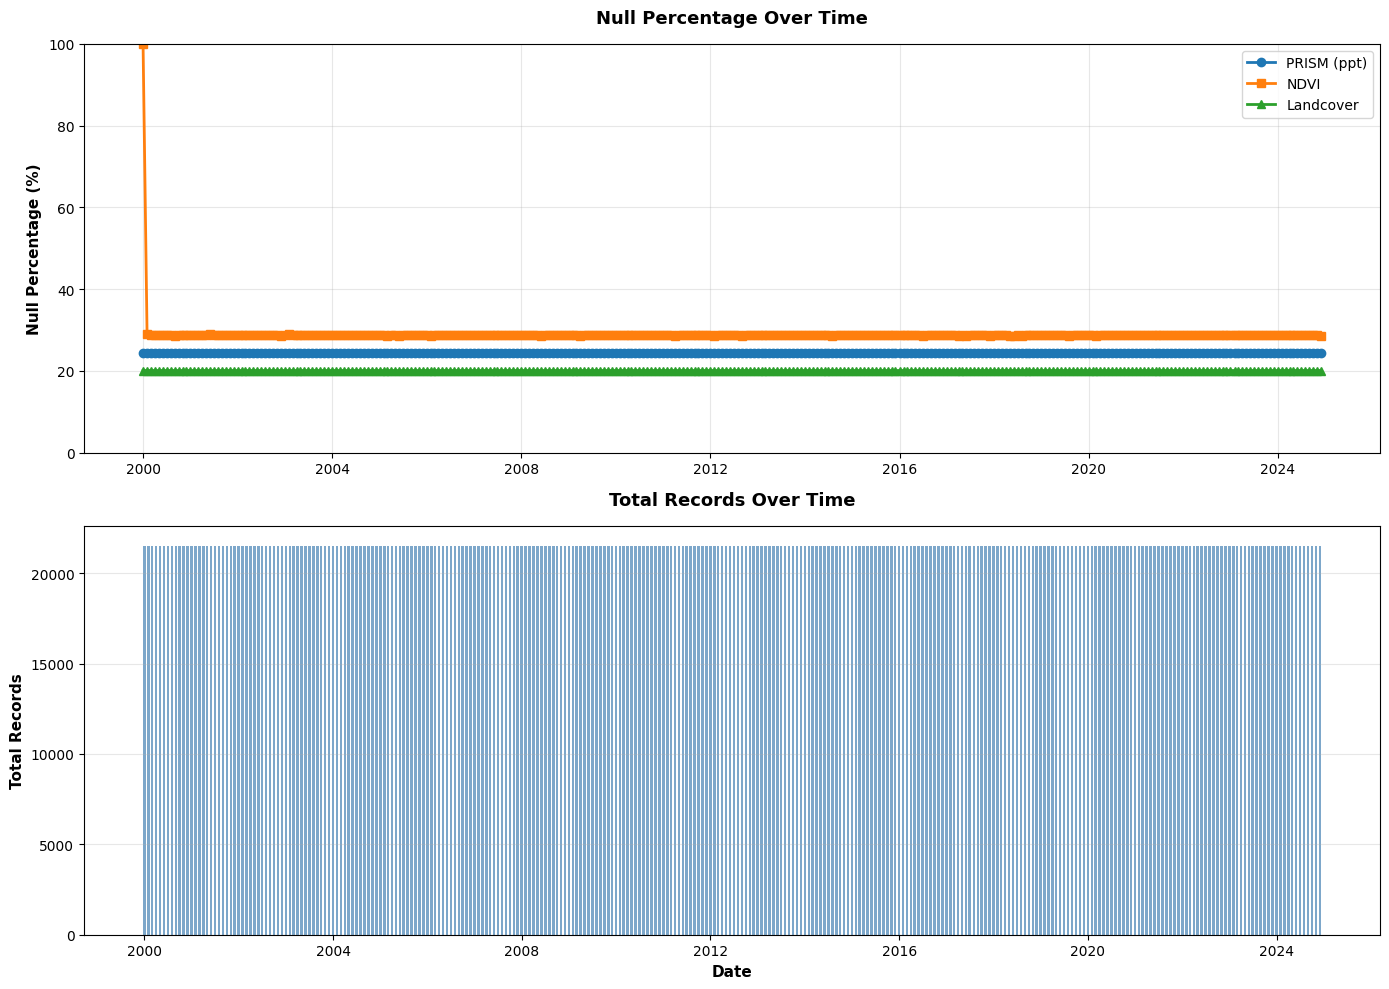

In [9]:
# Null counts over time
temporal_nulls = df.groupby(['year', 'month']).apply(
    lambda x: pd.Series({
        'ppt_null_pct': x['ppt'].isnull().sum() / len(x) * 100,
        'ndvi_null_pct': x['ndvi'].isnull().sum() / len(x) * 100,
        'landcover_null_pct': x['landcover'].isnull().sum() / len(x) * 100,
        'total_records': len(x)
    }),
    include_groups=False
).reset_index()

temporal_nulls['date'] = pd.to_datetime(
    temporal_nulls['year'].astype(str) + '-' + temporal_nulls['month'].astype(str) + '-01'
)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Null percentages over time
axes[0].plot(temporal_nulls['date'], temporal_nulls['ppt_null_pct'], 
            marker='o', label='PRISM (ppt)', linewidth=2)
axes[0].plot(temporal_nulls['date'], temporal_nulls['ndvi_null_pct'], 
            marker='s', label='NDVI', linewidth=2)
axes[0].plot(temporal_nulls['date'], temporal_nulls['landcover_null_pct'], 
            marker='^', label='Landcover', linewidth=2)
axes[0].set_ylabel('Null Percentage (%)', fontweight='bold', fontsize=11)
axes[0].set_title('Null Percentage Over Time', fontweight='bold', fontsize=13, pad=15)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0, 100)

# Total records over time
axes[1].bar(temporal_nulls['date'], temporal_nulls['total_records'], 
           width=20, alpha=0.7, color='steelblue')
axes[1].set_xlabel('Date', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Total Records', fontweight='bold', fontsize=11)
axes[1].set_title('Total Records Over Time', fontweight='bold', fontsize=13, pad=15)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Insights:

1. Year 2000 has an anomaly where NDVI nulls spike to 100%.
2. Climate and Landcover nulls are consistently missing throughout the entire period. This suggests that the missingness could be spatial instead of temporal.
3. The amount of data is stable across the entire period (~22,000 records per time period) with a monthly pattern. This suggests that the data maintains consistent spatial coverage over time.

### Next Steps:

Investigate year 2000 for NDVI nulls to see if we can find a pattern and decide whather to impute or drop. Then visualize the spatial patterns of the nulls for climate and landcover.

### Missingness in NDVI

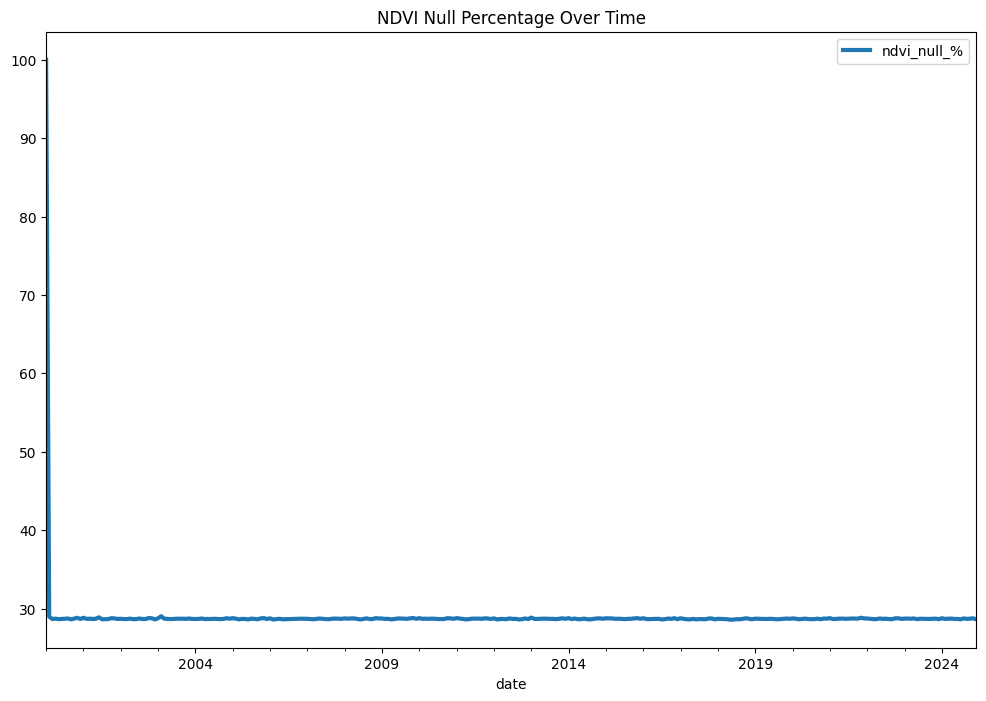

In [10]:
ndvi_null_stats = df.groupby(['year', 'month']).apply(
    lambda x: pd.Series({
        'ndvi_null_%': x['ndvi'].isnull().sum() / len(x) * 100,
        'total_records': len(x)
    }),
    include_groups=False
).reset_index()

ndvi_null_stats['date'] = pd.to_datetime(
    ndvi_null_stats['year'].astype(str) + '-' + ndvi_null_stats['month'].astype(str) + '-01'
)

ndvi_null_stats.plot(x='date', y='ndvi_null_%', kind='line', title='NDVI Null Percentage Over Time', linewidth=3, figsize=(12, 8))
plt.show()

In [11]:
ndvi_null_stats.head()

year  month  ndvi_null_%  total_records       date
0  2000      1   100.000000        21528.0 2000-01-01
1  2000      2    28.971572        21528.0 2000-02-01
2  2000      3    28.669640        21528.0 2000-03-01
3  2000      4    28.711446        21528.0 2000-04-01
4  2000      5    28.651059        21528.0 2000-05-01

### Insights:

1. The missingness in NDVI data is 100% in January 2000 and drops to a more stable percentage from February 2000 onwards. This is because the MODIS satellite was launched in December 1999 and began data collection in February 2000.

### Next Steps:

Since the data is missing by design, we can drop the data for January 2000.

In [12]:
df = df.drop(df[((df['year'] == 2000) & (df['month'] == 1))].index)
df[['month', 'year']].groupby('year').nunique().head()

month
year       
2000     11
2001     12
2002     12
2003     12
2004     12

### Spatial Missingness Analysis

In [13]:
null_df = df[['year', 'month', 'lat', 'lon', 'ppt', 'tdmean', 'tmax', 'vpdmax', 'ndvi', 'landcover']].copy()
null_df['ppt_null'] = null_df['ppt'].isnull()
null_df['tdmean_null'] = null_df['tdmean'].isnull()
null_df['tmax_null'] = null_df['tmax'].isnull()
null_df['vpdmax_null'] = null_df['vpdmax'].isnull()
null_df['ndvi_null'] = null_df['ndvi'].isnull()
null_df['landcover_null'] = null_df['landcover'].isnull()

null_df.head()

year  month       lat        lon  ppt  tdmean  tmax  vpdmax  ndvi  \
1  2000      2  32.53333 -117.60833  NaN     NaN   NaN     NaN   NaN   
2  2000      3  32.53333 -117.60833  NaN     NaN   NaN     NaN   NaN   
3  2000      4  32.53333 -117.60833  NaN     NaN   NaN     NaN   NaN   
4  2000      5  32.53333 -117.60833  NaN     NaN   NaN     NaN   NaN   
5  2000      6  32.53333 -117.60833  NaN     NaN   NaN     NaN   NaN   

   landcover  ppt_null  tdmean_null  tmax_null  vpdmax_null  ndvi_null  \
1       52.0      True         True       True         True       True   
2       52.0      True         True       True         True       True   
3       52.0      True         True       True         True       True   
4       52.0      True         True       True         True       True   
5       52.0      True         True       True         True       True   

   landcover_null  
1           False  
2           False  
3           False  
4           False  
5           False

In [20]:
spatial_nulls = null_df.groupby(['lat', 'lon'])[[
    'ppt_null', 'tdmean_null', 'tmax_null', 
    'vpdmax_null', 'ndvi_null', 'landcover_null'
]].mean().reset_index()

cols_to_scale = ['ppt_null', 'tdmean_null', 'tmax_null', 'vpdmax_null', 'ndvi_null', 'landcover_null']
spatial_nulls[cols_to_scale] = spatial_nulls[cols_to_scale] * 100

def plot_null_map(target_col):
    fig = px.scatter_map(
        spatial_nulls,
        lat="lat",
        lon="lon",
        color=target_col,
        
        color_continuous_scale="RdYlGn_r", 
        
        hover_data={
            "lat": True, 
            "lon": True, 
            "ndvi_null": ":.1f",
            "ppt_null": ":.1f",
            "landcover_null": ":.1f"
        },
        
        zoom=8, 
        center={"lat": 33.0, "lon": -117.0}, 
        height=700,
        title=f"Spatial Distribution of Null Values (%)",
        labels={target_col: f"{target_col} null %"}
    )

    fig.update_traces(marker=dict(size=6, opacity=0.4))
    fig.update_layout(
        mapbox_style="open-street-map",
        margin={"r":0,"t":50,"l":0,"b":0}
    )

    fig.show()

plot_null_map('ndvi_null')

In [21]:
plot_null_map('ppt_null')

In [22]:
plot_null_map('landcover_null')

In [23]:
null_df = df[['year', 'month', 'lat', 'lon', 'ppt', 'tdmean', 'tmax', 'vpdmax', 'ndvi', 'landcover']].copy()
null_df['ppt_null'] = null_df['ppt'].isnull()
null_df['tdmean_null'] = null_df['tdmean'].isnull()
null_df['tmax_null'] = null_df['tmax'].isnull()
null_df['vpdmax_null'] = null_df['vpdmax'].isnull()
null_df['ndvi_null'] = null_df['ndvi'].isnull()
null_df['landcover_null'] = null_df['landcover'].isnull()

spatial_nulls = null_df.groupby(['lat', 'lon'])[[
    'ppt_null', 'tdmean_null', 'tmax_null', 
    'vpdmax_null', 'ndvi_null', 'landcover_null'
]].mean().reset_index()

# --- FLIP LOGIC START ---
# Reflect the data along the x-axis (flip latitude) in the center of the square
# Formula: new_lat = max_lat + min_lat - current_lat
spatial_nulls['lat'] = spatial_nulls['lat'].max() + spatial_nulls['lat'].min() - spatial_nulls['lat']
# --- FLIP LOGIC END ---

cols_to_scale = ['ppt_null', 'tdmean_null', 'tmax_null', 'vpdmax_null', 'ndvi_null', 'landcover_null']
spatial_nulls[cols_to_scale] = spatial_nulls[cols_to_scale] * 100

def plot_null_map(target_col):
    fig = px.scatter_map(
        spatial_nulls,
        lat="lat",
        lon="lon",
        color=target_col,
        
        color_continuous_scale="RdYlGn_r", 
        
        hover_data={
            "lat": True, 
            "lon": True, 
            "ndvi_null": ":.1f",
            "ppt_null": ":.1f",
            "landcover_null": ":.1f"
        },
        
        zoom=8, 
        center={"lat": 33.0, "lon": -117.0}, 
        height=700,
        title=f"Spatial Distribution of Null Values (%) - Flipped",
        labels={target_col: f"{target_col} null %"}
    )

    fig.update_traces(marker=dict(size=6, opacity=0.4))
    fig.update_layout(
        mapbox_style="open-street-map",
        margin={"r":0,"t":50,"l":0,"b":0}
    )

    fig.show()

plot_null_map('landcover_null')

### Insights:

1. NDVI nulls are due to not being inside San Diego County and being in the ocean. It pretty much follows the coastline and the landmass of San Diego County.
2. Climate nulls are due to not being inside San Diego County and being in the ocean. It goes outside of the coastline a little but but doesn't go too far.
3. Landcover nulls are are spatially clustered but they extend into San Diego county, unlike NDVI and Climate. This means that it isn't missing due to ocean or coastline, but could be missing because of lack of coverage. 


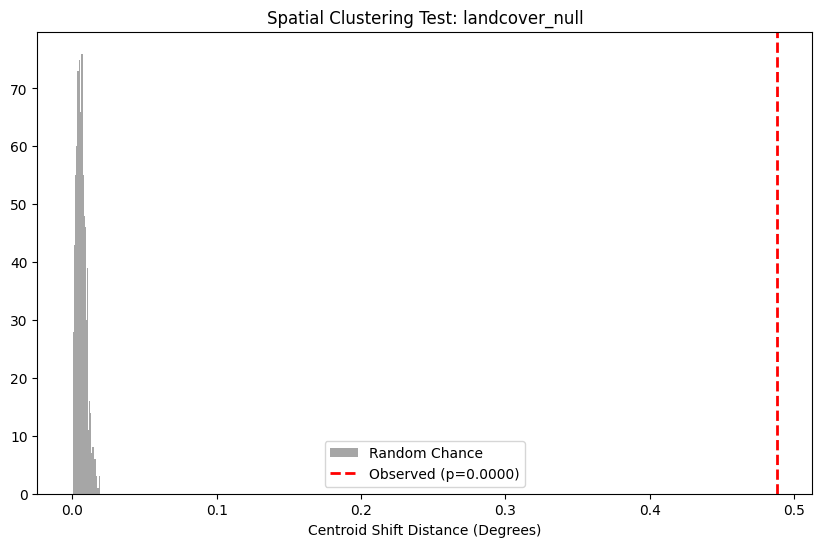

Observed Shift: 0.48830
Mean Random Shift: 0.00623
P-Value: 0.00000


In [15]:
def permutation_test_2d_spatial(null_col, n_perms=1000):
    """
    Tests if missing values in 'null_col' (from global null_df) are spatially clustered.
    """
    global null_df

    spatial_df = null_df.groupby(['lat', 'lon'])[null_col].any().reset_index()
    
    coords = spatial_df[['lat', 'lon']].values
    is_missing = spatial_df[null_col].values
    
    if is_missing.sum() == 0:
        print(f"No missing values found in {null_col}.")
        return

    # Define Statistic: Shift in Centroid
    def get_centroid_shift(mask, points):
        if mask.sum() == 0: return 0
        missing_center = points[mask].mean(axis=0)
        global_center = points.mean(axis=0)
        return np.linalg.norm(missing_center - global_center)

    observed_shift = get_centroid_shift(is_missing, coords)
    
    # Permutation Test
    perm_shifts = []
    shuffled_mask = is_missing.copy()
    
    for _ in range(n_perms):
        np.random.shuffle(shuffled_mask)
        perm_shifts.append(get_centroid_shift(shuffled_mask, coords))

    perm_shifts = np.array(perm_shifts)
    p_val = (perm_shifts >= observed_shift).mean()
    
    plt.figure(figsize=(10, 6))
    plt.hist(perm_shifts, bins=30, alpha=0.7, color='gray', label='Random Chance')
    plt.axvline(observed_shift, color='red', linestyle='--', linewidth=2, label=f'Observed (p={p_val:.4f})')
    plt.title(f'Spatial Clustering Test: {null_col}')
    plt.xlabel('Centroid Shift Distance (Degrees)')
    plt.legend()
    plt.show()
    
    print(f"Observed Shift: {observed_shift:.5f}")
    print(f"Mean Random Shift: {perm_shifts.mean():.5f}")
    print(f"P-Value: {p_val:.5f}")

permutation_test_2d_spatial('landcover_null')

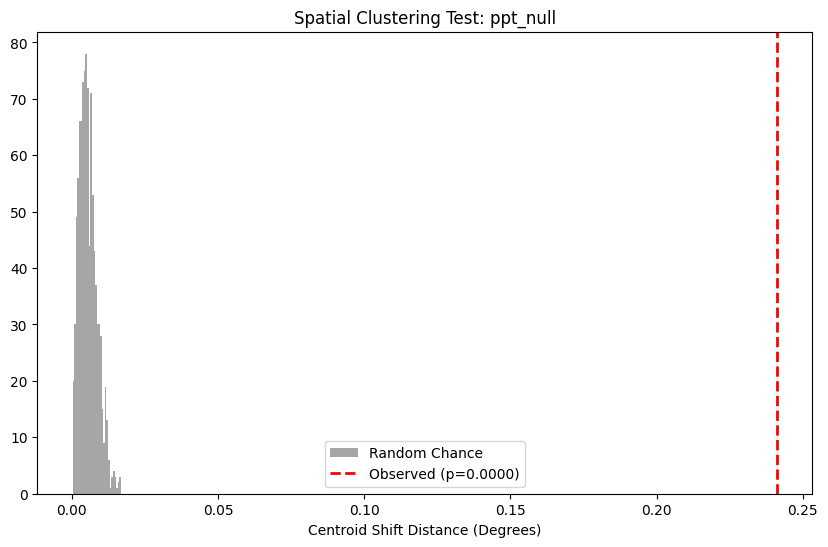

Observed Shift: 0.24122
Mean Random Shift: 0.00555
P-Value: 0.00000


In [16]:
permutation_test_2d_spatial('ppt_null')

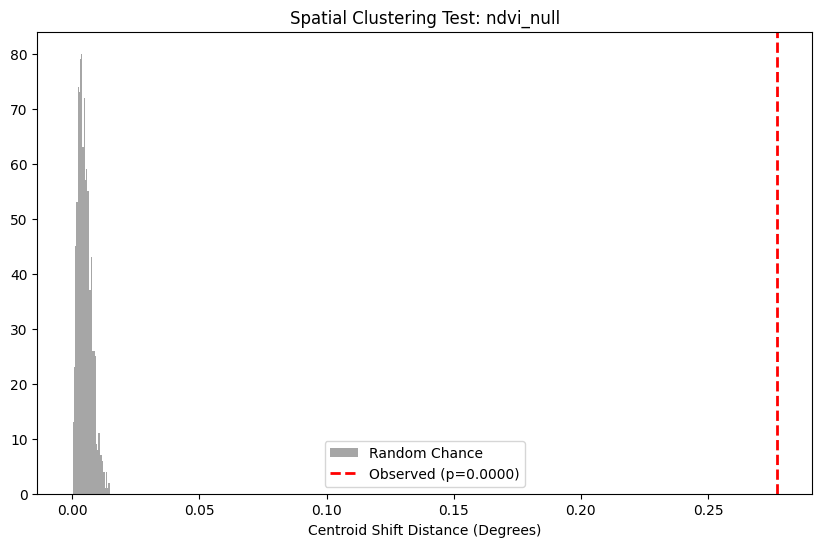

Observed Shift: 0.27721
Mean Random Shift: 0.00482
P-Value: 0.00000


In [17]:
permutation_test_2d_spatial('ndvi_null')

## Temporal Distribution Analysis

In [18]:
print(f"Years: {df['year'].min()} to {df['year'].max()}")
print(f"Unique year-month combinations: {df[['year', 'month']].drop_duplicates().shape[0]}")
print(f"\nRecords per year:")
print(df['year'].value_counts().sort_index())
print(f"\nRecords per month:")
print(df['month'].value_counts().sort_index())

Years: 2000 to 2024
Unique year-month combinations: 299

Records per year:
year
2000    236808
2001    258336
2002    258336
2003    258336
2004    258336
2005    258336
2006    258336
2007    258336
2008    258336
2009    258336
2010    258336
2011    258336
2012    258336
2013    258336
2014    258336
2015    258336
2016    258336
2017    258336
2018    258336
2019    258336
2020    258336
2021    258336
2022    258336
2023    258336
2024    258336
Name: count, dtype: int64

Records per month:
month
1     516672
2     538200
3     538200
4     538200
5     538200
6     538200
7     538200
8     538200
9     538200
10    538200
11    538200
12    538200
Name: count, dtype: int64


## Variable Distribution Analysis

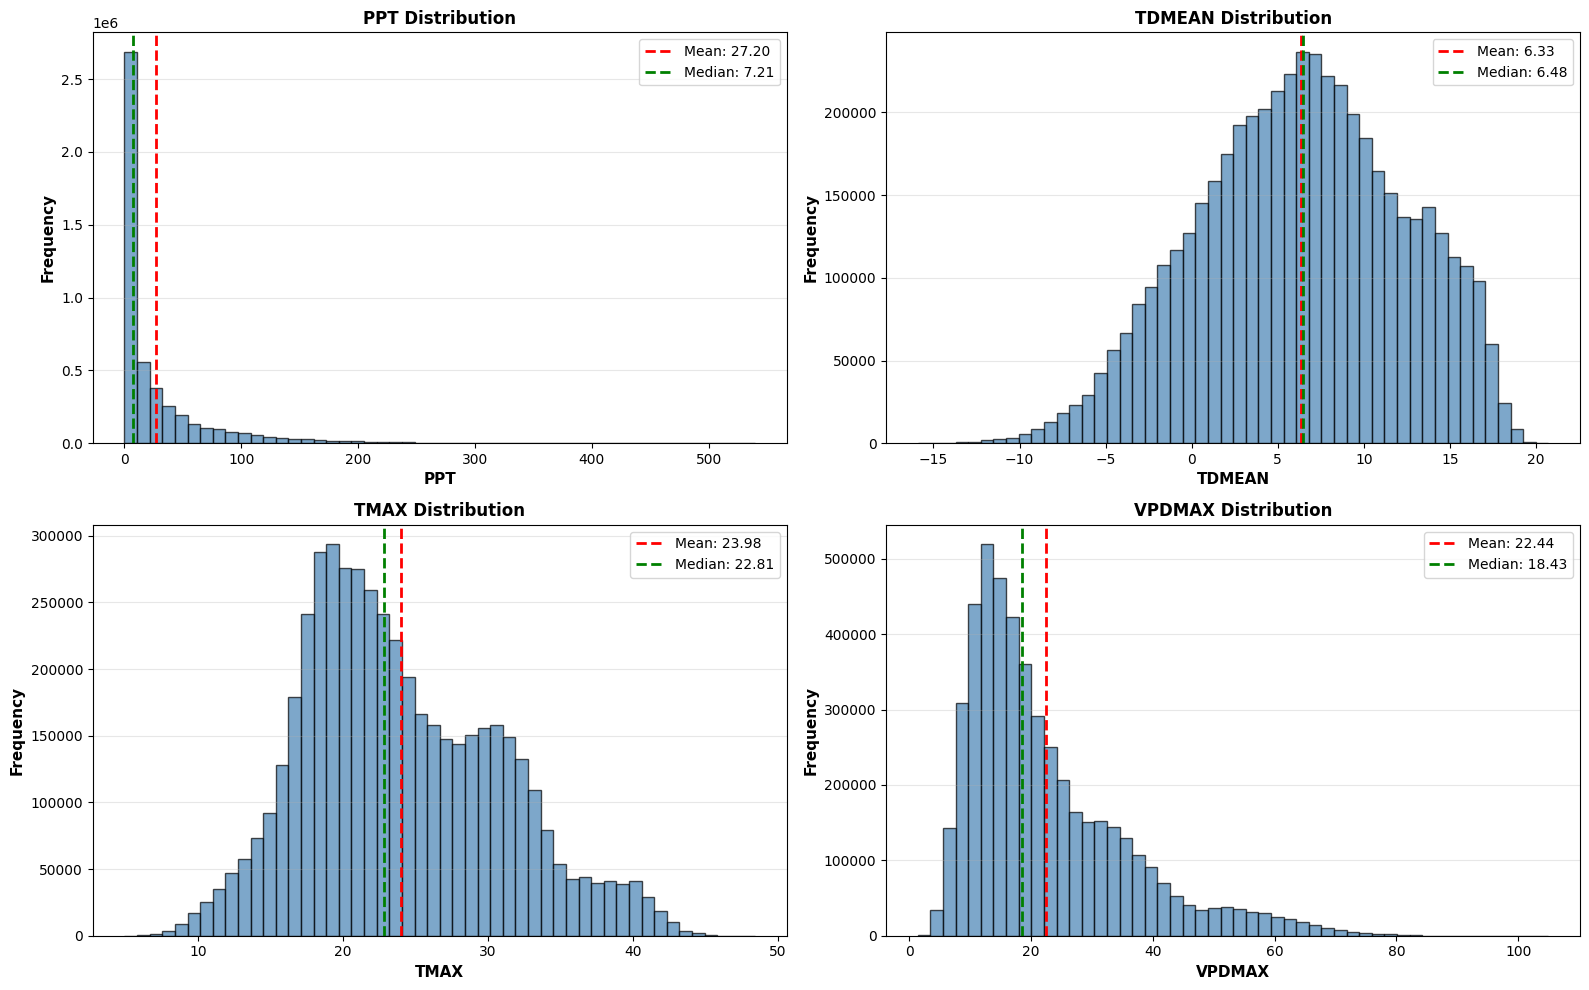

In [19]:
climate_vars = ['ppt', 'tdmean', 'tmax', 'vpdmax']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, var in enumerate(climate_vars):
    data = df[var].dropna()
    
    axes[idx].hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
    axes[idx].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
    
    axes[idx].set_xlabel(var.upper(), fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontweight='bold', fontsize=11)
    axes[idx].set_title(f'{var.upper()} Distribution', fontweight='bold', fontsize=12)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### PPT Distribution (Precipitation)

1. Extreme right skewed towards zero because San Diego is mostly dry. 
2. We might need to use a log transformation to normalize the data. 
3. This data is critical for modeling fuel and dryness.

### TDMEAN Distribution (Dew Point Temperature)

1. Pretty much normally distributed centered around 6-7 degrees Celsius.

### TMAX Distribution (Maximum Temperature)

1. Slightly right skewed but mostly normal. Doesn't need any transformations.
2. Can feature engineer to create a head threshold variable for extreme temperature events.

### VPDMAX Distribution (Maximum Vapor Pressure Deficit)

1. Moderately right skewed with concentration around 10 to 30 hPa. 
2. Can feature engineer to create bins.

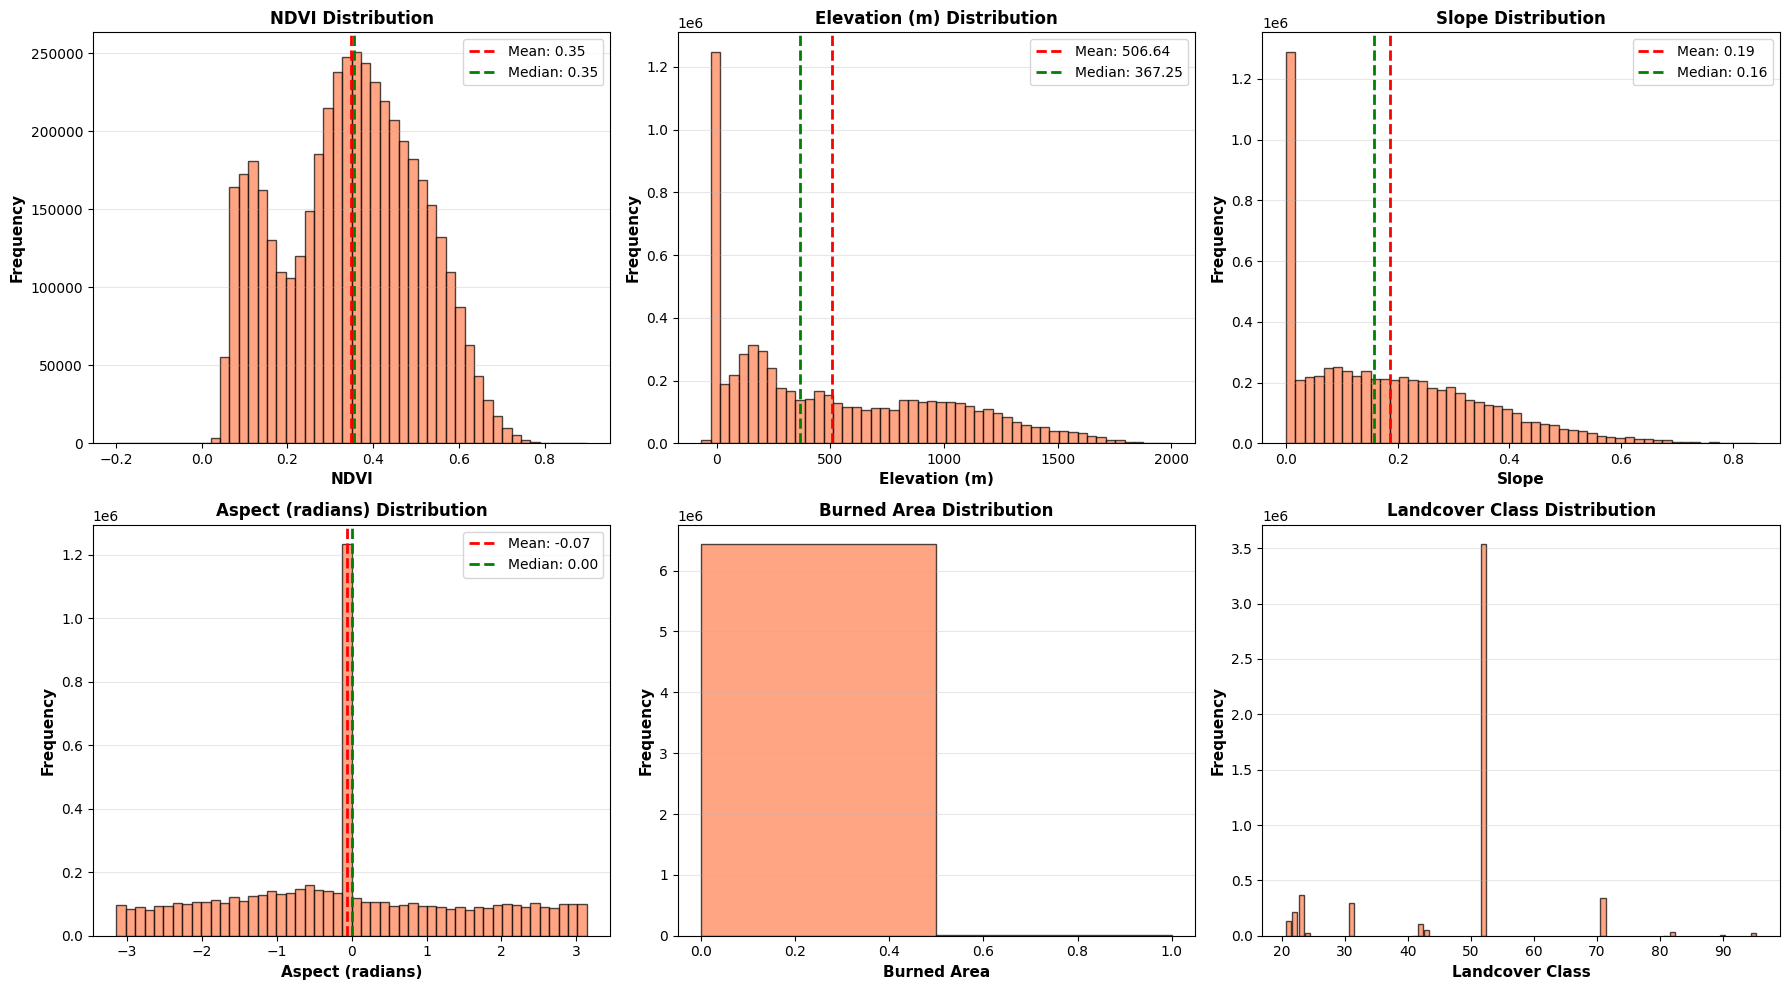

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

vars_to_plot = [
    ('ndvi', 'NDVI', 50),
    ('elevation', 'Elevation (m)', 50),
    ('slope', 'Slope', 50),
    ('aspect', 'Aspect (radians)', 50),
    ('burned_area', 'Burned Area', 2),
    ('landcover', 'Landcover Class', 20)
]

for idx, (var, label, bins) in enumerate(vars_to_plot):
    data = df[var].dropna()
    
    if var == 'landcover':
        # Bar plot for categorical
        value_counts = data.value_counts().sort_index()
        axes[idx].bar(value_counts.index, value_counts.values, alpha=0.7, color='coral', edgecolor='black')
    else:
        axes[idx].hist(data, bins=bins, alpha=0.7, color='coral', edgecolor='black')
        if var != 'burned_area':  # Skip mean/median for binary
            axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
            axes[idx].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
    
    axes[idx].set_xlabel(label, fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('Frequency', fontweight='bold', fontsize=11)
    axes[idx].set_title(f'{label} Distribution', fontweight='bold', fontsize=12)
    if var != 'landcover' and var != 'burned_area':
        axes[idx].legend()
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### NDVI Distribution

1. A little bimodal peaking at 0.1 and 0.4. This means there are mostly unhealthy plants and moderately healthy plants.
2. This could be due to geographical variations.

### Elevation Distribution

1. Massive spike at 0, indicating that the data includes a lot of ocean, which may be null data for other variables.

### Slope Distribution

1. Heavily skewed to the right, indicating mostly flat terrain.
2. Important for wild fire to determine spread.

### Aspect Distribution

1. Extreme spike at zero, which corresponds to slope being skewed towards zero (no direction).

### Burned Area Distribution

1. Extremely zero-inflated, indicating most areas are not burned. This means that fire events are rare.
2. Ths will create class imbalance. We may need to use balancing techniques.

### Landcover Distribution

1. Dominated by class 52 which are shrubs and scrubs. 
2. One-hot encoding this will create imbalanced features (rare vs common classes).

## Correlation Analysis

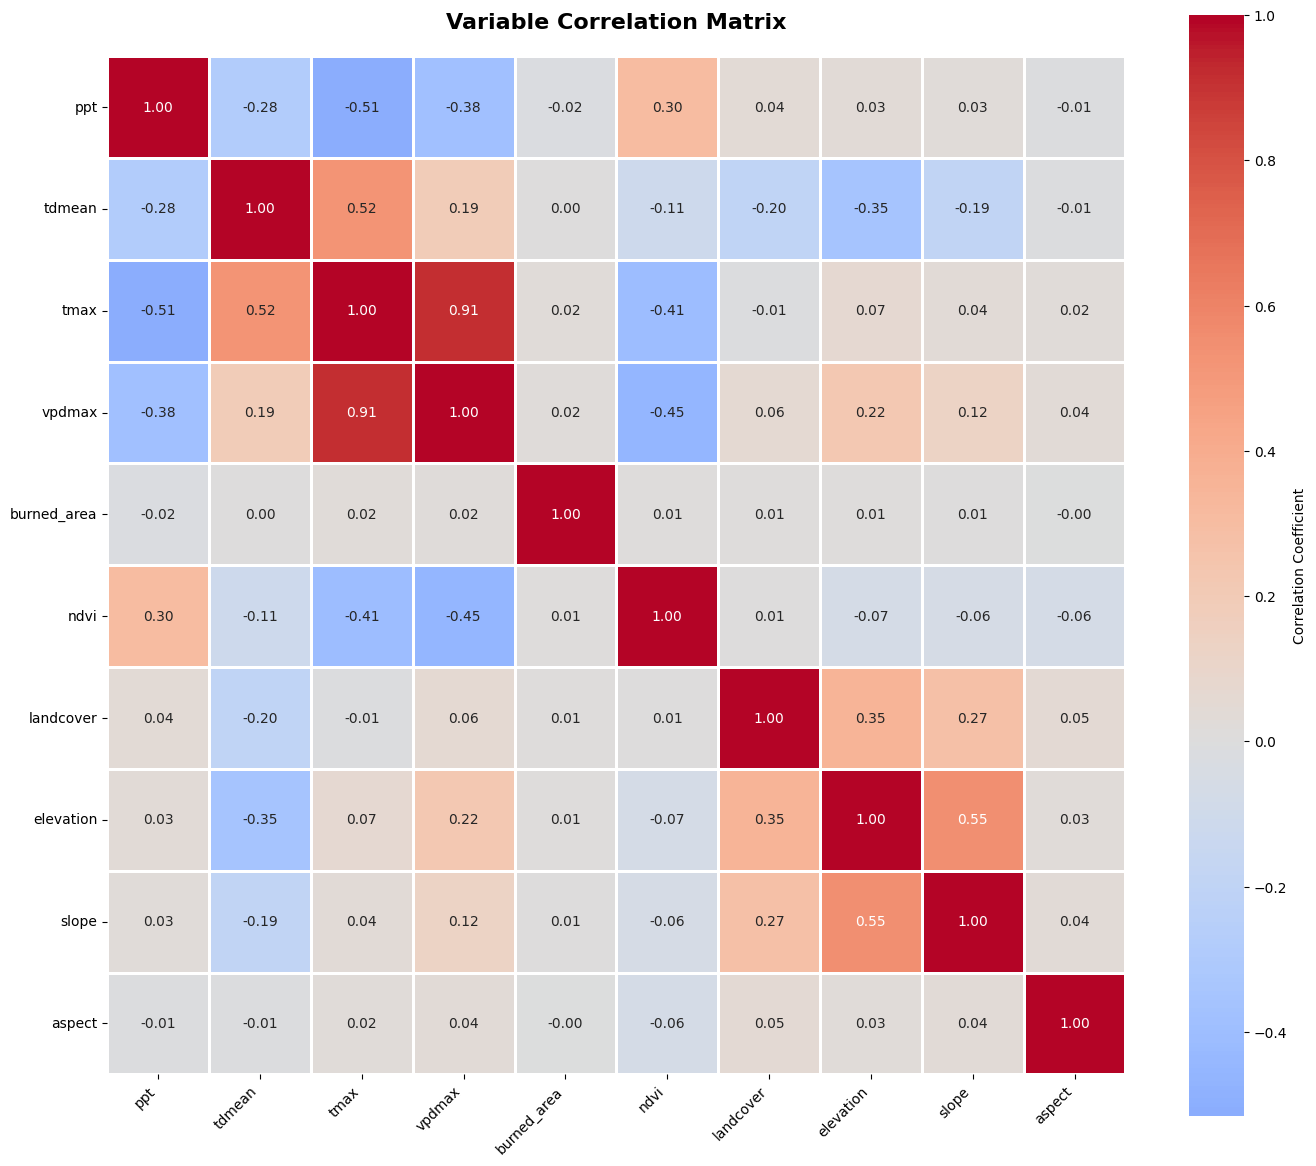

Strong Correlations (|r| > 0.5)
ppt             <-> tmax           : -0.515
tdmean          <-> tmax           :  0.523
tmax            <-> vpdmax         :  0.913
elevation       <-> slope          :  0.551


In [21]:
numeric_cols = ['ppt', 'tdmean', 'tmax', 'vpdmax', 'burned_area', 'ndvi', 
                'landcover', 'elevation', 'slope', 'aspect']
corr_matrix = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax,
            cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Variable Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Strong Correlations (|r| > 0.5)")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(f"{corr_matrix.columns[i]:15s} <-> {corr_matrix.columns[j]:15s}: {corr_matrix.iloc[i, j]:6.3f}")

### Insight:

1. High correlation between TMAX and VPDMAX:
    - Strong positive correlation could lead to multicollinearity issues in the model. 
    - May need to drop one of the variables or use dimensionality reduction techniques (PCA).

2. Moderate correlation between TDMEAN and TMAX:
    - Logical positive correlation, warmer days have higher dew points.

3. Moderate correlation between elevation and slope:
    - Logical positive correlation, higher elevation has steeper slopes.

4. Moderate correlation between PPT and TMAX:
    - Logical negative correlation, rainy days are cooler and dry days are warmer.

## Data Quality Summary

In [22]:
print("\n1. Completeness:")
print(f"   - Total records: {len(df):,}")
print(f"   - Unique spatial locations: {df[['lat', 'lon']].drop_duplicates().shape[0]:,}")
print(f"   - Time range: {df['year'].min()}-{df['year'].max()} ({df['year'].nunique()} years)")
print(f"   - Months covered: {df['month'].nunique()} months")

print("\n2. Null Values:")
for col in df.columns:
    null_count = df[col].isnull().sum()
    null_pct = null_count / len(df) * 100
    if null_count > 0:
        print(f"   - {col:15s}: {null_count:8,} ({null_pct:5.2f}%)")
    else:
        print(f"   - {col:15s}: Complete")

print("\n3. Data Ranges:")
for col in numeric_cols:
    if col in df.columns:
        data = df[col].dropna()
        print(f"   - {col:15s}: [{data.min():10.2f}, {data.max():10.2f}]")

print("\n4. Unique Values:")
for col in ['landcover', 'burned_area', 'year', 'month']:
    print(f"   - {col:15s}: {df[col].nunique()} unique values")


1. Completeness:
   - Total records: 6,436,872
   - Unique spatial locations: 21,528
   - Time range: 2000-2024 (25 years)
   - Months covered: 12 months

2. Null Values:
   - lat            : Complete
   - lon            : Complete
   - year           : Complete
   - month          : Complete
   - ppt            : 1,563,172 (24.28%)
   - tdmean         : 1,563,172 (24.28%)
   - tmax           : 1,563,172 (24.28%)
   - vpdmax         : 1,563,172 (24.28%)
   - burned_area    : Complete
   - ndvi           : 1,847,136 (28.70%)
   - landcover      : 1,291,154 (20.06%)
   - elevation      : Complete
   - slope          : Complete
   - aspect         : Complete

3. Data Ranges:
   - ppt            : [      0.00,     539.71]
   - tdmean         : [    -15.91,      20.73]
   - tmax           : [      4.94,      48.42]
   - vpdmax         : [      1.38,     104.96]
   - burned_area    : [      0.00,       1.00]
   - ndvi           : [     -0.20,       0.90]
   - landcover      : [     21.00, 